# Proyecto Semestral 2025-2 - Gestión de Datos (IN1232C)

Estudiantes: Álvaro Molina Jara, Maicol Ramírez Mariño, Vicente Lillo Gallegos

## ETAPA 2: Análisis exploratorio y perfilado
Rango temporal: 6 meses de datos (Marzo–Agosto 2020)

### Carga de los 6 meses de DataFrames y unión

In [1]:
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
dfs = []
failed_files = []

mes_inicio = 3
mes_fin = 8

for month in range(mes_inicio, mes_fin + 1):
    month_str = str(month).zfill(2)
    for day in range(1, 32):
        day_str = str(day).zfill(2)
        file_name = f"{month_str}-{day_str}-2020.csv"
        file_url = f"{base_url}{file_name}"

        try:
            response = requests.get(file_url)
            response.raise_for_status()
            df = pd.read_csv(StringIO(response.text))
            df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex = True)
            df.columns = df.columns.str.lower()

            column_renames = {
                'lastupdate': 'last_update',
                'observationdate': 'last_update',
                'latitude': 'lat',
                'longitude': 'long_',
                'confirmedcases': 'confirmed',
                'case-fatality_ratio': 'case_fatality_ratio',
                'casefatality_ratio': 'case_fatality_ratio',
                'provincestate': 'province_state',
                'countryregion': 'country_region',
                'incidence_rate': 'incident_rate'
            }
            df = df.rename(columns = column_renames)

            required_cols = ['last_update', 'confirmed', 'deaths', 'recovered', 'country_region', 'province_state']
            for col in required_cols:
                if col not in df.columns:
                    df[col] = pd.NA

            df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')
            df.dropna(subset = ['last_update'], inplace = True)
            dfs.append(df)
            print(f"Se cargó exitosamente {file_name}")
        except requests.exceptions.RequestException as e:
            print(f"No se pudo cargar {file_name}: {e}")
            failed_files.append(file_name)
        except Exception as e:
            print(f"Ocurrió un error inesperado al intentar procesar {file_name}: {e}")
            failed_files.append(file_name)

if dfs:
    combined_df = pd.concat(dfs, ignore_index = True)
else:
    print("No se cargaron DataFrames.")

if failed_files:
    print("\nArchivos que no se pudieron cargar:")
    for file in failed_files:
        print(file)

if 'combined_df' in locals() and not combined_df.empty:
    output_filename = 'covid_marzo_agosto_2020.csv'
    combined_df.to_csv(output_filename, index = False)
    print(f"\nDataFrame guardado como '{output_filename}'")
    file_size_mb = os.path.getsize(output_filename) / (1024 * 1024)
    print(f"Tamaño del archivo: {file_size_mb:.2f} MB")
else:
    print("\nNo hay un DataFrame combinado para guardar.")

Se cargó exitosamente 03-01-2020.csv
Se cargó exitosamente 03-02-2020.csv
Se cargó exitosamente 03-03-2020.csv
Se cargó exitosamente 03-04-2020.csv
Se cargó exitosamente 03-05-2020.csv
Se cargó exitosamente 03-06-2020.csv
Se cargó exitosamente 03-07-2020.csv
Se cargó exitosamente 03-08-2020.csv
Se cargó exitosamente 03-09-2020.csv
Se cargó exitosamente 03-10-2020.csv
Se cargó exitosamente 03-11-2020.csv
Se cargó exitosamente 03-12-2020.csv
Se cargó exitosamente 03-13-2020.csv
Se cargó exitosamente 03-14-2020.csv
Se cargó exitosamente 03-15-2020.csv
Se cargó exitosamente 03-16-2020.csv
Se cargó exitosamente 03-17-2020.csv
Se cargó exitosamente 03-18-2020.csv
Se cargó exitosamente 03-19-2020.csv
Se cargó exitosamente 03-20-2020.csv
Se cargó exitosamente 03-21-2020.csv


/tmp/ipython-input-489372402.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 03-22-2020.csv
Se cargó exitosamente 03-23-2020.csv
Se cargó exitosamente 03-24-2020.csv
Se cargó exitosamente 03-25-2020.csv
Se cargó exitosamente 03-26-2020.csv
Se cargó exitosamente 03-27-2020.csv


/tmp/ipython-input-489372402.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 03-28-2020.csv


/tmp/ipython-input-489372402.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')
/tmp/ipython-input-489372402.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 03-29-2020.csv
Se cargó exitosamente 03-30-2020.csv
Se cargó exitosamente 03-31-2020.csv
Se cargó exitosamente 04-01-2020.csv
Se cargó exitosamente 04-02-2020.csv


/tmp/ipython-input-489372402.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 04-03-2020.csv


/tmp/ipython-input-489372402.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 04-04-2020.csv
Se cargó exitosamente 04-05-2020.csv


/tmp/ipython-input-489372402.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_update'] = pd.to_datetime(df['last_update'], errors = 'coerce')


Se cargó exitosamente 04-06-2020.csv
Se cargó exitosamente 04-07-2020.csv
Se cargó exitosamente 04-08-2020.csv
Se cargó exitosamente 04-09-2020.csv
Se cargó exitosamente 04-10-2020.csv
Se cargó exitosamente 04-11-2020.csv
Se cargó exitosamente 04-12-2020.csv
Se cargó exitosamente 04-13-2020.csv
Se cargó exitosamente 04-14-2020.csv
Se cargó exitosamente 04-15-2020.csv
Se cargó exitosamente 04-16-2020.csv
Se cargó exitosamente 04-17-2020.csv
Se cargó exitosamente 04-18-2020.csv
Se cargó exitosamente 04-19-2020.csv
Se cargó exitosamente 04-20-2020.csv
Se cargó exitosamente 04-21-2020.csv
Se cargó exitosamente 04-22-2020.csv
Se cargó exitosamente 04-23-2020.csv
Se cargó exitosamente 04-24-2020.csv
Se cargó exitosamente 04-25-2020.csv
Se cargó exitosamente 04-26-2020.csv
Se cargó exitosamente 04-27-2020.csv
Se cargó exitosamente 04-28-2020.csv
Se cargó exitosamente 04-29-2020.csv
Se cargó exitosamente 04-30-2020.csv
No se pudo cargar 04-31-2020.csv: 404 Client Error: Not Found for url: http

In [2]:
combined_df

,province_state,country_region,last_update,confirmed,deaths,recovered,lat,long_,fips,admin2,active,combined_key,incident_rate,case_fatality_ratio
0,Hubei,Mainland China,2020-03-01 10:13:19,66907,2761,31536,30.9756,112.2707,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,South Korea,2020-03-01 23:43:03,3736,17,30,36.0000,128.0000,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Italy,2020-03-01 23:23:02,1694,34,83,43.0000,12.0000,NaN,NaN,NaN,NaN,NaN,NaN
3,Guangdong,Mainland China,2020-03-01 14:13:18,1349,7,1016,23.3417,113.4244,NaN,NaN,NaN,NaN,NaN,NaN
4,Henan,Mainland China,2020-03-01 14:13:18,1272,22,1198,33.8820,113.6140,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591001,Unknown,Ukraine,2020-09-01 04:28:31,0,0,0,NaN,NaN,NaN,NaN,0.0,"Unknown, Ukraine",0.0,0.0
591002,NaN,Nauru,2020-09-01 04:28:31,0,0,0,-0.5228,166.9315,NaN,NaN,0.0,Nauru,0.0,0.0
591003,Niue,New Zealand,2020-09-01 04:28:31,0,0,0,-19.0544,-169.8672,NaN,NaN,0.0,"Niue, New Zealand",0.0,0.0
591004,NaN,Tuvalu,2020-09-01 04:28:31,0,0,0,-7.1095,177.6493,NaN,NaN,0.0,Tuvalu,0.0,0.0


### Limpieza del DF

In [3]:
combined_df.drop(['admin2', 'combined_key', 'fips', 'lat', 'long_'], axis = 1, inplace = True)
combined_df['last_update'] = pd.to_datetime(combined_df['last_update'], errors = 'coerce')
combined_df['last_update'] = combined_df['last_update'].dt.strftime('%Y-%m-%d')
combined_df['country_region'] = combined_df['country_region'].replace('US', 'United States')
combined_df['active_cases'] = combined_df['confirmed'] - combined_df['deaths'] - combined_df['recovered']
combined_df.drop(['active'], axis = 1, inplace = True)

In [4]:
print("Primeras 5 filas antes de limpiar los valores NaN:")
display(combined_df.head())

print("\nRecuento de valores NaN por columna antes de la limpieza:")
print(combined_df[['country_region', 'province_state', 'confirmed', 'deaths', 'recovered', 'active_cases', 'incident_rate', 'case_fatality_ratio']].isnull().sum())

combined_df['country_region'] = combined_df['country_region'].fillna('Unknown')
combined_df['province_state'] = combined_df['province_state'].fillna('Unknown')
combined_df['confirmed'] = combined_df['confirmed'].fillna(0)
combined_df['deaths'] = combined_df['deaths'].fillna(0)
combined_df['recovered'] = combined_df['recovered'].fillna(0)
combined_df['active_cases'] = combined_df['active_cases'].fillna(0)
combined_df['incident_rate'] = combined_df['incident_rate'].fillna(0)
combined_df['case_fatality_ratio'] = combined_df['case_fatality_ratio'].fillna(0)

print("\nRecuento de valores NaN por columna después de la limpieza:")
print(combined_df[['country_region', 'province_state', 'confirmed', 'deaths', 'recovered', 'active_cases', 'incident_rate', 'case_fatality_ratio']].isnull().sum())

print("\nPrimeras 5 filas después de limpiar los valores NaN:")
display(combined_df.head())

Primeras 5 filas antes de limpiar los valores NaN:


,province_state,country_region,last_update,confirmed,deaths,recovered,incident_rate,case_fatality_ratio,active_cases
0,Hubei,Mainland China,2020-03-01,66907,2761,31536,NaN,NaN,32610
1,NaN,South Korea,2020-03-01,3736,17,30,NaN,NaN,3689
2,NaN,Italy,2020-03-01,1694,34,83,NaN,NaN,1577
3,Guangdong,Mainland China,2020-03-01,1349,7,1016,NaN,NaN,326
4,Henan,Mainland China,2020-03-01,1272,22,1198,NaN,NaN,52



Recuento de valores NaN por columna antes de la limpieza:
country_region              0
province_state          32029
confirmed                   0
deaths                      0
recovered                   0
active_cases                0
incident_rate          230607
case_fatality_ratio    229145
dtype: int64

Recuento de valores NaN por columna después de la limpieza:
country_region         0
province_state         0
confirmed              0
deaths                 0
recovered              0
active_cases           0
incident_rate          0
case_fatality_ratio    0
dtype: int64

Primeras 5 filas después de limpiar los valores NaN:


,province_state,country_region,last_update,confirmed,deaths,recovered,incident_rate,case_fatality_ratio,active_cases
0,Hubei,Mainland China,2020-03-01,66907,2761,31536,0.0,0.0,32610
1,Unknown,South Korea,2020-03-01,3736,17,30,0.0,0.0,3689
2,Unknown,Italy,2020-03-01,1694,34,83,0.0,0.0,1577
3,Guangdong,Mainland China,2020-03-01,1349,7,1016,0.0,0.0,326
4,Henan,Mainland China,2020-03-01,1272,22,1198,0.0,0.0,52


In [5]:
combined_df.drop_duplicates(inplace = True)

### 1. ¿Cuáles son los 10 países con más casos confirmados acumulados durante el semestre?

In [6]:
pais_caso = combined_df.groupby('country_region')['confirmed'].sum().reset_index()
pais_caso.sort_values(by = 'confirmed', ascending = False).head(10)

,country_region,confirmed
230,United States,409027339
26,Brazil,203387111
99,India,129910683
179,Russia,77237362
202,Spain,39823472
229,United Kingdom,38530327
167,Peru,37267654
106,Italy,35633645
142,Mexico,32695625
101,Iran,31153266


### 2. ¿Qué países presentan mayor tasa de letalidad (Deaths / Confirmed * 100)?


In [7]:
letalidad = combined_df.groupby('country_region')[['confirmed', 'deaths']].sum().reset_index()
letalidad['letalidad'] = (letalidad['deaths'] / letalidad['confirmed']) * 100
letalidad[['country_region', 'letalidad']].sort_values('letalidad', ascending = False).round(2).head(10)

,country_region,letalidad
239,Yemen,27.48
128,MS Zaandam,22.09
229,United Kingdom,19.22
19,Belgium,14.62
106,Italy,13.87
73,France,13.52
167,Peru,12.96
97,Hungary,12.70
152,Netherlands,11.39
142,Mexico,11.19


### 3. ¿Cuántos países no registran recuperados en los datos analizados?

In [8]:
recuperados = combined_df.groupby('country_region')['recovered'].sum().reset_index()
sin_recuperados = recuperados[recuperados['recovered'].fillna(0) == 0]
print(f"La cantidad de países que no registran recuperados es de {len(sin_recuperados)}")


La cantidad de países que no registran recuperados es de 41


### 4. ¿Qué país latinoamericano presenta la mayor cantidad de casos activos en junio de 2020?

In [14]:
combined_df['last_update'] = pd.to_datetime(combined_df['last_update'])

latam = {"Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Costa Rica", "Cuba", "Dominican Republic",
         "Ecuador", "El Salvador", "Guatemala", "Honduras", "Mexico", "Nicaragua", "Panama",
         "Paraguay", "Peru", "Uruguay", "Venezuela"}

junio_2020 = combined_df[(combined_df['last_update'].dt.month == 6) & (combined_df['last_update'].dt.year == 2020)]
latam_df = junio_2020[junio_2020['country_region'].isin(latam)]

latam_activos = latam_df.groupby('country_region')['active_cases'].sum().reset_index()
mayor_casos = latam_activos.sort_values('active_cases', ascending = False).head(1)

display(mayor_casos)
print(f"El país latinoamericano con mayor cantidad de casos activos en junio de 2020 fue {latam_activos.sort_values('active_cases', ascending = False).iloc[0, 0]}.")

,country_region,active_cases
2,Brazil,11885215


El país latinoamericano con mayor cantidad de casos activos en junio de 2020 fue Brazil.


### 5. ¿Cómo evolucionaron los casos confirmados en Chile entre marzo y agosto? (gráfico de líneas)

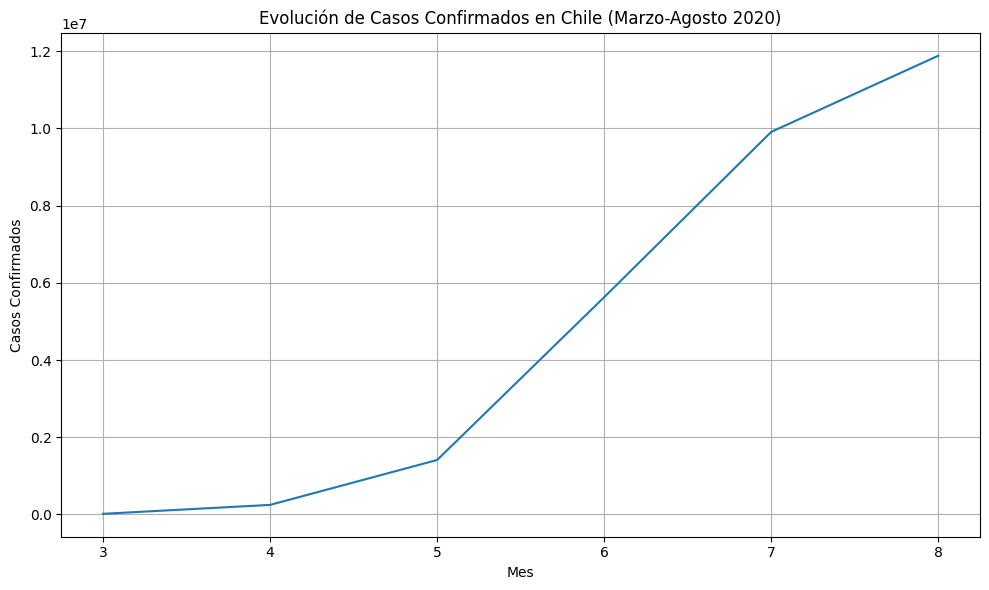

In [10]:
combined_df['last_update'] = pd.to_datetime(combined_df['last_update'])

chile_df = combined_df[combined_df['country_region'] == 'Chile'].copy()
chile_df['month'] = chile_df['last_update'].dt.month

chile_monthly_cases = chile_df[chile_df['month'] <= 8].groupby('month')['confirmed'].sum().reset_index()

plt.figure(figsize = (10, 6))
sns.lineplot(data = chile_monthly_cases, x = 'month', y = 'confirmed')
plt.title('Evolución de Casos Confirmados en Chile (Marzo-Agosto 2020)')
plt.xlabel('Mes')
plt.ylabel('Casos Confirmados')
plt.grid(True)
plt.tight_layout()
plt.show()

En este gráfico, se evidencia como a partir del mes de mayo, comienza a aumentar considerablemente la cantidad de nuevos casos confirmados en Chile, lo que se mantiene durante el segundo semestre de 2020.

### 6. ¿Cuál fue la fecha con más nuevos casos a nivel mundial durante este período?

In [12]:
combined_df['last_update'] = pd.to_datetime(combined_df['last_update'])
combined_df = combined_df.sort_values(by = ['country_region', 'last_update'])
combined_df['confirmed_diff'] = combined_df.groupby('country_region')['confirmed'].diff().fillna(0)
combined_df['last_update'] = combined_df['last_update'].dt.date

casos_diarios_nuevos = combined_df.groupby('last_update')['confirmed_diff'].sum().reset_index()

max_casos_diarios_nuevos = casos_diarios_nuevos.loc[casos_diarios_nuevos['confirmed_diff'].idxmax()]

print(f'La fecha con más nuevos casos a nivel mundial fue el {max_casos_diarios_nuevos['last_update']} con {max_casos_diarios_nuevos['confirmed_diff']:.0f} nuevos casos.')

La fecha con más nuevos casos a nivel mundial fue el 2020-06-29 con 263637 nuevos casos.


### 7. ¿Existe correlación entre casos confirmados y fallecidos? (gráfico de dispersión + regresión)


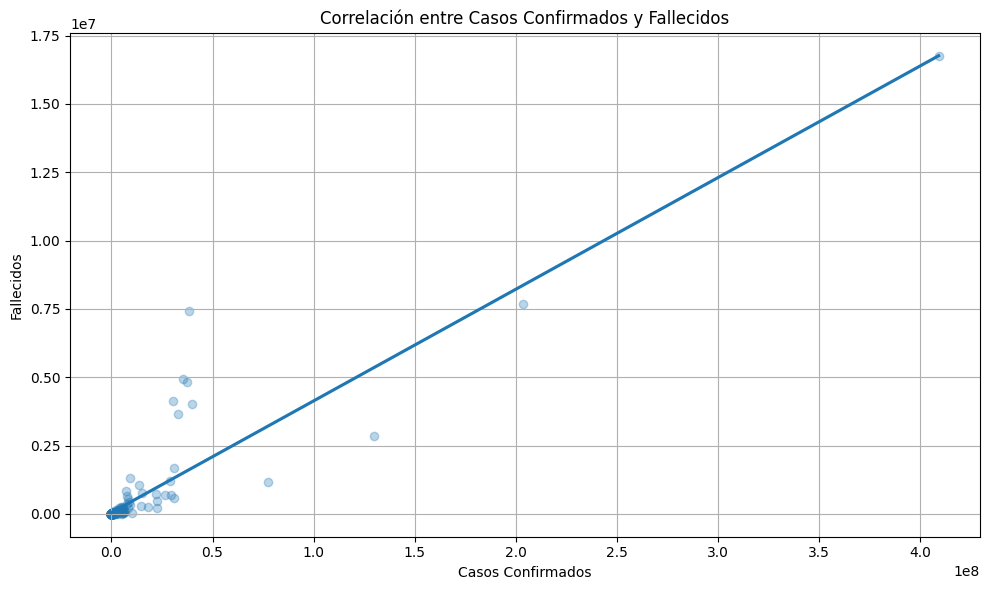


El coeficiente de correlación entre Casos Confirmados y Fallecidos es: 0.90


In [12]:
correlation_df = combined_df.groupby('country_region')[['confirmed', 'deaths']].sum().reset_index()

plt.figure(figsize = (10, 6))
sns.regplot(data = correlation_df, x = 'confirmed', y = 'deaths', scatter_kws = {'alpha': 0.3}, ci = None)
plt.title('Correlación entre Casos Confirmados y Fallecidos')
plt.xlabel('Casos Confirmados')
plt.ylabel('Fallecidos')
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = correlation_df['confirmed'].corr(correlation_df['deaths'])
print(f"\nEl coeficiente de correlación entre Casos Confirmados y Fallecidos es: {correlation:.2f}")

Este gráfico de dispersión confirma una tendencia fuerte y esperada sobre el incremento de casos confirmados (0.90 corresponde a una relación lineal positiva muy fuerte), ya que estos suelen ir acompañado de un incremento en fallecidos.

### 8. Mostrar el Top 10 de países con mayor crecimiento porcentual de casos entre mayo y junio

In [13]:
combined_df['last_update'] = pd.to_datetime(combined_df['last_update'])
mayo = combined_df[(combined_df['last_update'].dt.month == 5) & (combined_df['last_update'].dt.year == 2020)]
junio = combined_df[(combined_df['last_update'].dt.month == 6) & (combined_df['last_update'].dt.year == 2020)]

casos_mayo = mayo.groupby('country_region')['confirmed'].sum().reset_index()
casos_junio = junio.groupby('country_region')['confirmed'].sum().reset_index()

crecimiento = pd.merge(casos_mayo, casos_junio, on = 'country_region', suffixes = ('_mayo', '_junio'))

crecimiento['crecimiento_porcentual'] = np.where(
    crecimiento['confirmed_mayo'] == 0,
    np.where(crecimiento['confirmed_junio'] == 0, 0, np.inf),
    ((crecimiento['confirmed_junio'] - crecimiento['confirmed_mayo']) / crecimiento['confirmed_mayo']) * 100
)

crecimiento.sort_values('crecimiento_porcentual', ascending = False).round(2).head(10)

,country_region,confirmed_mayo,confirmed_junio,crecimiento_porcentual
168,Suriname,329,6885,1992.71
114,Mauritania,3535,63217,1688.32
125,Nepal,11991,198360,1554.24
128,Nicaragua,4868,48521,896.73
101,Lesotho,27,247,814.81
75,Haiti,13628,119048,773.55
60,Ethiopia,11732,101933,768.85
109,Malawi,2500,18434,637.36
196,Zimbabwe,1733,11683,574.15
34,Central African Republic,10378,68031,555.53


Aquí se evidencia que Surinam, Mauritania y Nepal presentaron el mayor incremento porcentual de casos confirmados entre mayo y junio de 2020, con crecimientos superiores al 1000%.

### 9. Identificar países con rebrote (un día sin casos y luego un incremento posterior)

In [14]:
combined_df['last_update'] = pd.to_datetime(combined_df['last_update'])
combined_df = combined_df.sort_values(by = ['country_region', 'last_update'])

combined_df['confirmed_diff'] = combined_df.groupby('country_region')['confirmed'].diff().fillna(0)

rebrote_paises = set()

for country in combined_df['country_region'].unique():
    country_df = combined_df[combined_df['country_region'] == country].copy()
    country_df['confirmed_shift'] = country_df['confirmed_diff'].shift(-1).fillna(0)

    rebrote_dias = country_df[(country_df['confirmed_diff'] == 0) & (country_df['confirmed_shift'] > 0)]

    if not rebrote_dias.empty:
        rebrote_paises.add(country)

print("Países con posibles rebrotes:")
for pais in rebrote_paises:
    print(pais)

Países con posibles rebrotes:
Germany
Haiti
Kuwait
Colombia
Mayotte
Central African Republic
Pakistan
Laos
Egypt
Oman
Portugal
Suriname
Albania
Lesotho
Monaco
Zimbabwe
Rwanda
United Kingdom
Georgia
Paraguay
Iceland
Burundi
Libya
Mongolia
Yemen
Iraq
Azerbaijan
West Bank and Gaza
Mauritius
Taiwan*
Lithuania
Slovakia
Liberia
Bangladesh
Grenada
Uganda
Greece
Congo (Kinshasa)
Eritrea
Turkey
Bosnia and Herzegovina
Ecuador
Cruise Ship
Ireland
Nepal
United States
El Salvador
Guadeloupe
Cyprus
Botswana
MS Zaandam
Cambodia
Denmark
French Guiana
Belgium
China
Aruba
Croatia
Tunisia
Mali
Liechtenstein
Cote d'Ivoire
Mexico
Netherlands
South Korea
Poland
Ghana
Israel
San Marino
Malaysia
Eswatini
Sweden
Jordan
Bahrain
Equatorial Guinea
Uzbekistan
Benin
Bulgaria
Brazil
Peru
Italy
Saudi Arabia
Congo (Brazzaville)
Ethiopia
Lebanon
Bahamas
India
Serbia
Belarus
Angola
Burkina Faso
Hungary
New Zealand
Argentina
Syria
Dominica
Indonesia
Fiji
Seychelles
Romania
Gambia
Kosovo
Mauritania
Zambia
Comoros
Bolivia


### 10. Generar un reporte de perfilado automático (ydata-profiling o pandas_profiling) que incluya distribuciones, correlaciones y resumen de calidad de datos

In [ ]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(combined_df, title = "Profiling Report: COVID-19 Data (March-August 2020)")
profile.to_notebook_iframe()
profile.to_file("perfilado.html")

## Optimización del DF

### Tiempo de carga y uso de memoria del DF antes de las optimizaciones

Se miden los tiempos de carga y uso de memoria del DataFrame antes de aplicar cualquier optimización:

In [16]:
import time

start_time = time.time()
combined_df = pd.read_csv('covid_marzo_agosto_2020.csv')
end_time = time.time()
loading_time = end_time - start_time
memory_usage_mb = combined_df.memory_usage(deep = True).sum() / (1024 * 1024)
print(f"Tiempo de carga del archivo: {loading_time:.2f} segundos")
print(f"Uso de memoria del DataFrame 'combined_df': {memory_usage_mb:.2f} MB")

Tiempo de carga del archivo: 2.02 segundos
Uso de memoria del DataFrame 'combined_df': 208.08 MB


In [17]:
print("\nUso de memoria por columna (antes de la optimización):")
print(combined_df.memory_usage(deep = True) / (1024 * 1024))


Uso de memoria por columna (antes de la optimización):
Index                   0.000126
province_state         31.588891
country_region         29.213953
last_update            38.326653
confirmed               4.509018
deaths                  4.509018
recovered               4.509018
lat                     4.509018
long_                   4.509018
fips                    4.509018
admin2                 29.446343
active                  4.509018
combined_key           38.921175
incident_rate           4.509018
case_fatality_ratio     4.509018
dtype: float64


### Optimización de carga del DF usand Dask en vez de Pandas


**Justificación**: Dask está especializado para manejar grandes conjuntos de datos (que incluso superan el tamaño de la memoria RAM), a diferencia de Pandas que solo es capaz de manejar conjuntos de datos pequeños y medianos menores al tamaño de la memoria RAM disponible.



In [18]:
import dask.dataframe as dd

file_path = 'covid_marzo_agosto_2020.csv'

dtype_dict = {
    'province_state': 'object',
    'country_region': 'object',
    'last_update': 'object',
    'confirmed': 'float64',
    'deaths': 'float64',
    'recovered': 'float64',
    'lat': 'float64',
    'long_': 'float64',
    'fips': 'float64',
    'admin2': 'object',
    'active': 'float64',
    'combined_key': 'object',
    'incident_rate': 'float64',
    'case_fatality_ratio': 'float64'
}

print(f"Cargando '{file_path}' con Dask...")
start_time = time.time()
dask_df = dd.read_csv(file_path, dtype = dtype_dict, assume_missing = True)
end_time = time.time()
loading_time_dask = end_time - start_time
print(f"Tiempo de carga con Dask (solo metadatos): {loading_time_dask:.2f} segundos")

print("Persistiendo el DataFrame de Dask en memoria...")
start_time_persist = time.time()
dask_df_persisted = dask_df.persist()
_ = dask_df_persisted.head()
end_time_persist = time.time()
persist_time = end_time_persist - start_time_persist
print(f"Tiempo de persistencia de Dask: {persist_time:.2f} segundos")

print("\nEstructura del DataFrame de Dask:")
print(dask_df_persisted)
print(f"Número de particiones: {dask_df_persisted.npartitions}")

Cargando 'covid_marzo_agosto_2020.csv' con Dask...
Tiempo de carga con Dask (solo metadatos): 0.13 segundos
Persistiendo el DataFrame de Dask en memoria...
Tiempo de persistencia de Dask: 6.97 segundos

Estructura del DataFrame de Dask:
Dask DataFrame Structure:
              province_state country_region last_update confirmed   deaths recovered      lat    long_     fips  admin2   active combined_key incident_rate case_fatality_ratio
npartitions=1                                                                                                                                                                  
                      string         string      string   float64  float64   float64  float64  float64  float64  string  float64       string       float64             float64
                         ...            ...         ...       ...      ...       ...      ...      ...      ...     ...      ...          ...           ...                 ...
Dask Name: read, 1 expression
Exp

In [19]:
memory_usage_dask_mb = dask_df_persisted.memory_usage(deep = True).sum().compute() / (1024 * 1024)
print(f"Uso de memoria del DataFrame de Dask (persistente): {memory_usage_dask_mb:.2f} MB")

Uso de memoria del DataFrame de Dask (persistente): 94.90 MB


### Resumen de Optimización con Dask

#### Comparación de Tiempos de Carga:
*   **Pandas (carga completa):** `2.02 segundos`
*   **Dask (solo metadatos):** `0.13 segundos`
*   **Dask (persistencia y computación):** `6.97 segundos`

#### Comparación de Uso de Memoria:
*   **Pandas DataFrame:** `208.08 MB`
*   **Dask DataFrame (persistido):** `94.90 MB`

Se observa una reducción significativa en el uso de memoria del DataFrame de Dask persistido en comparación con el DataFrame de Pandas. Aunque el tiempo total para cargar y persistir el DataFrame de Dask es ligeramente mayor que el de Pandas para esta carga específica, Dask ofrece ventajas sustanciales para el procesamiento de datos que exceden la memoria disponible, gracias a su capacidad de operar de forma diferida y en paralelo. La carga inicial de metadatos con Dask es casi instantánea, lo que permite una manipulación rápida de la estructura del DataFrame.

### Optimización de tipos de datos

Se procede a convertir las columnas numéricas (`confirmed`, `deaths`, `recovered`, `active_cases`, `incident_rate`, `case_fatality_ratio`) a tipos de datos más eficientes en memoria (por ejemplo, `float32`, `int32`) y la columna `last_update` a un formato datetime optimizado:

In [20]:
optimized_dtypes = {
    'confirmed': 'float32',
    'deaths': 'float32',
    'recovered': 'float32',
    'lat': 'float32',
    'long_': 'float32',
    'fips': 'float32',
    'active': 'float32',
    'incident_rate': 'float32',
    'case_fatality_ratio': 'float32',
    'province_state': 'category',
    'country_region': 'category',
    'admin2': 'category',
    'combined_key': 'category'
}

dask_df_optimized = dask_df_persisted.astype({k: v for k, v in optimized_dtypes.items() if k in dask_df_persisted.columns})
dask_df_optimized['last_update'] = dd.to_datetime(dask_df_optimized['last_update'], errors = 'coerce')
print("Persistiendo el DataFrame de Dask optimizado en memoria...")
dask_df_optimized = dask_df_optimized.persist()
print("DataFrame de Dask optimizado y persistido.")
print("\nTipos de datos del DataFrame de Dask optimizado:")
print(dask_df_optimized.dtypes)
memory_usage_dask_optimized_mb = dask_df_optimized.memory_usage(deep=True).sum().compute() / (1024 * 1024)
print(f"\nUso de memoria del DataFrame de Dask optimizado: {memory_usage_dask_optimized_mb:.2f} MB")

Persistiendo el DataFrame de Dask optimizado en memoria...
DataFrame de Dask optimizado y persistido.

Tipos de datos del DataFrame de Dask optimizado:
province_state               category
country_region               category
last_update            datetime64[ns]
confirmed                     float32
deaths                        float32
recovered                     float32
lat                           float32
long_                         float32
fips                          float32
admin2                       category
active                        float32
combined_key                 category
incident_rate                 float32
case_fatality_ratio           float32
dtype: object

Uso de memoria del DataFrame de Dask optimizado: 29.68 MB


### Uso de índices para operaciones temporales


Se establece la columna 'last_update' como el índice del DataFrame (después de la conversión a datetime) para acelerar las operaciones basadas en tiempo, como filtrados y agrupaciones por rango de fechas:

In [21]:
print("Estableciendo 'last_update' como índice y persistiendo...")
dask_df_optimized = dask_df_optimized.set_index('last_update')
dask_df_optimized = dask_df_optimized.persist()

print("\nEstructura del DataFrame de Dask optimizado con índice de fecha:")
print(dask_df_optimized)

Estableciendo 'last_update' como índice y persistiendo...

Estructura del DataFrame de Dask optimizado con índice de fecha:
Dask DataFrame Structure:
                  province_state     country_region confirmed   deaths recovered      lat    long_     fips             admin2   active       combined_key incident_rate case_fatality_ratio
npartitions=1                                                                                                                                                                               
               category[unknown]  category[unknown]   float32  float32   float32  float32  float32  float32  category[unknown]  float32  category[unknown]       float32             float32
                             ...                ...       ...      ...       ...      ...      ...      ...                ...      ...                ...           ...                 ...
Dask Name: operation, 1 expression
Expr=FromGraph(8bf411d)


### Conclusiones sobre mejoras de rendimiento después de las optimizaciones

**1. ¿Cuál era el rendimiento actual de la carga de "covid_marzo_agosto_2020.csv" y el uso de memoria del DataFrame `combined_df` antes de las optimizaciones?**

Inicialmente, cargar `covid_marzo_agosto_2020.csv` en un DataFrame de Pandas tardaba 2,02 segundos, y el `combined_df` consumía 208,08 MB de memoria. Las columnas `combined_key`, `last_update`, `province_state`, `country_region` y `admin2` eran las que más memoria consumían.

**2. ¿Cómo las optimizaciones de Dask y el tipo de datos mejoraron el rendimiento y el uso de la memoria?**

Con Dask, la carga inicial de metadatos fue muy rápida (0,13 segundos). La persistencia del DataFrame de Dask, que activa el cálculo, tardó 6,97 segundos, un poco más que la carga inicial de Pandas. Sin embargo, el DataFrame de Dask, antes de la optimización de tipos de datos, redujo el uso de memoria a 94,90 MB. Tras optimizar los tipos de datos (p. ej., `float32`, `category` y `datetime`), el consumo de memoria se redujo aún más, a 29,68 MB. Considerando las limitaciones de Google Colab en cuanto a uso de memoria con grandes conjuntos de datos, esta disminución del consumo de memoria es muy relevante.